# Pulsar Analysis-Group Proposal

### Load Library

In [1]:
#You need to install these packages before running
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Read Data from Web

In [2]:
url <- "https://github.com/arielpark821/DSCI-100-Group-3/raw/main/HTRU_2.csv"
download.file(url, "pulsar_data.csv")
pulsar_data <- read_csv("pulsar_data.csv", col_names = FALSE)
slice(pulsar_data, 1:5)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0


### Rename Columns according to website

In [3]:
pulsar_data <- rename(pulsar_data,
                      Mean_integrated = X1, 
                      Std_integrated = X2, 
                      Excess_kurtosis_integrated = X3, 
                      Skewness_integrated = X4,
                      Mean_curve = X5,
                      Std_curve = X6,
                      Excess_kurtosis_curve = X7,
                      Skewness_curve = X8,
                      Class = X9)
pulsar_data

Mean_integrated,Std_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_curve,Std_curve,Excess_kurtosis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


### Change Class from 0/1 to Yes/No and Change Class Type to Factor

In [4]:
pulsar_data <- pulsar_data |>
  mutate(Class = as_factor(Class)) |>
  mutate(Class = fct_recode(Class, "No" = "0", "Yes" = "1"))
pulsar_data

Mean_integrated,Std_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_curve,Std_curve,Excess_kurtosis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,No
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,No
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,No
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,No
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,No


### Select Dataset with Chosen Variables

In [5]:
pulsar_data_final <- pulsar_data |>
select(Mean_integrated, Std_integrated, Mean_curve, Std_curve, Class)
pulsar_data_final

Mean_integrated,Std_integrated,Mean_curve,Std_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,3.199833,19.11043,No
102.5078,58.88243,1.677258,14.86015,No
103.0156,39.34165,3.121237,21.74467,No
⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,21.430602,58.87200,No
114.5078,53.90240,1.946488,13.38173,No
57.0625,85.79734,188.306020,64.71256,No


### Scatterplot to visualize the relationship between Variables

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


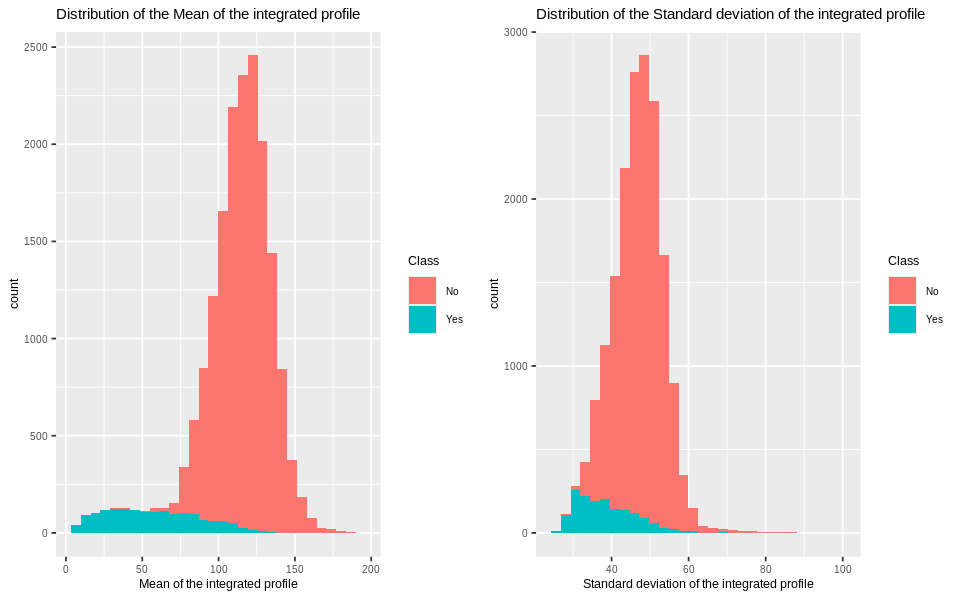

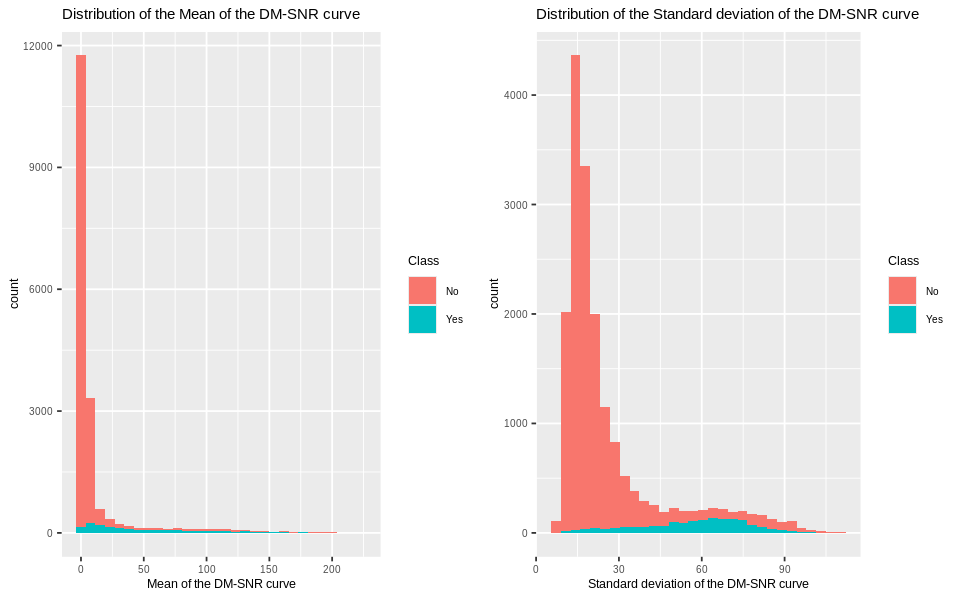

In [6]:
#You need to instal library(cowplot) to use plot_grid
library(cowplot)
options(repr.plot.width = 8, repr.plot.height = 5) 

histo_1 <- pulsar_data_final |> ggplot(aes(x = Mean_integrated, fill = Class)) +
        geom_histogram() +
        labs(x = "Mean of the integrated profile", y = "count") + 
        ggtitle("Distribution of the Mean of the integrated profile") +
        theme(text = element_text(size = 7.5))

histo_2 <- pulsar_data_final |> ggplot(aes(x = Std_integrated, fill = Class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the integrated profile", y = "count") +
        ggtitle("Distribution of the Standard deviation of the integrated profile") +
        theme(text = element_text(size = 7.5))

histo_3 <- pulsar_data_final |> ggplot(aes(x = Mean_curve, fill = Class)) +
        geom_histogram() +
        labs(x = "Mean of the DM-SNR curve", y = "count") +
        ggtitle("Distribution of the Mean of the DM-SNR curve") +
        theme(text = element_text(size = 7.5))

histo_4 <- pulsar_data_final |> ggplot(aes(x = Std_curve, fill = Class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the DM-SNR curve", y = "count") +
        ggtitle("Distribution of the Standard deviation of the DM-SNR curve") +
        theme(text = element_text(size = 7.5))

plot_grid(histo_1, histo_2)
plot_grid(histo_3, histo_4)

### Split Data into training and test dataset (Proportion 75%)

In [7]:
set.seed(1)
pulsar_split <- initial_split(pulsar_data_final, prop = 0.75, strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 5
$ Mean_integrated <dbl> 102.50781, 103.01562, 136.75000, 93.57031, 119.48438, …
$ Std_integrated  <dbl> 58.88243, 39.34165, 57.17845, 46.69811, 48.76506, 39.8…
$ Mean_curve      <dbl> 1.6772575, 3.1212375, 3.6429766, 1.6362876, 0.9991639,…
$ Std_curve       <dbl> 14.860146, 21.744669, 20.959280, 14.545074, 9.279612, …
$ Class           <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, No…
Rows: 4,475
Columns: 5
$ Mean_integrated <dbl> 140.56250, 88.72656, 142.07812, 133.25781, 109.64062, …
$ Std_integrated  <dbl> 55.68378, 40.67223, 45.28807, 44.05824, 49.01765, 41.1…
$ Mean_curve      <dbl> 3.199833, 1.178930, 5.376254, 1.632107, 1.508361, 3.55…
$ Std_curve       <dbl> 19.11043, 11.46872, 29.00990, 12.00781, 12.07290, 20.7…
$ Class           <fct> No, No, No, No, No, No, No, No, No, No, No, No, No, Ye…


### Number of Missing Values in the Dataset

In [8]:
missing_values <- sum(is.na(pulsar_train))
missing_values 

[1] 0

### Summary of Columns of Training Dataset

In [9]:
pulsar_summary_train <- pulsar_train |>
    group_by(Class) |>
    summarize(average_mean_integrated = mean(Mean_integrated), 
              average_std_integrated = mean(Std_integrated), 
              average_mean_curve = mean(Mean_curve),
              average_Std_curve = mean(Std_curve),
              count=n()) 

pulsar_summary_train
print("Table 1: Summary table of columns in training data set")

Class,average_mean_integrated,average_std_integrated,average_mean_curve,average_Std_curve,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
No,116.56317,47.34255,8.810401,23.25734,12200
Yes,57.00075,38.79521,49.041268,56.57318,1223


[1] "Table 1: Summary table of columns in training data set"


### Scale Data

In [10]:
set.seed(2)
pulsar_recipe <- recipe(Class ~ ., data = pulsar_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

### Tune Classifier to get Optimal K Value

In [11]:
#Use 5-fold validation
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = Class)

pulsar_knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
                set_engine('kknn') |>
                set_mode('classification')

### Create Workflow Analysis and Collect Metrics for K values 2 to 22

In [12]:
k_vals <- tibble(neighbors = seq(from = 2, to = 16, by = 1))

pulsar_knn_results <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(pulsar_knn_spec) |>
  tune_grid(resamples = pulsar_vfold, grid = k_vals) |>
  collect_metrics()

### Creating a Line Plot to Determine the K-value with the Highest Accuracy Estimate

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,accuracy,binary,0.9726593,5,0.001703735,Preprocessor1_Model08


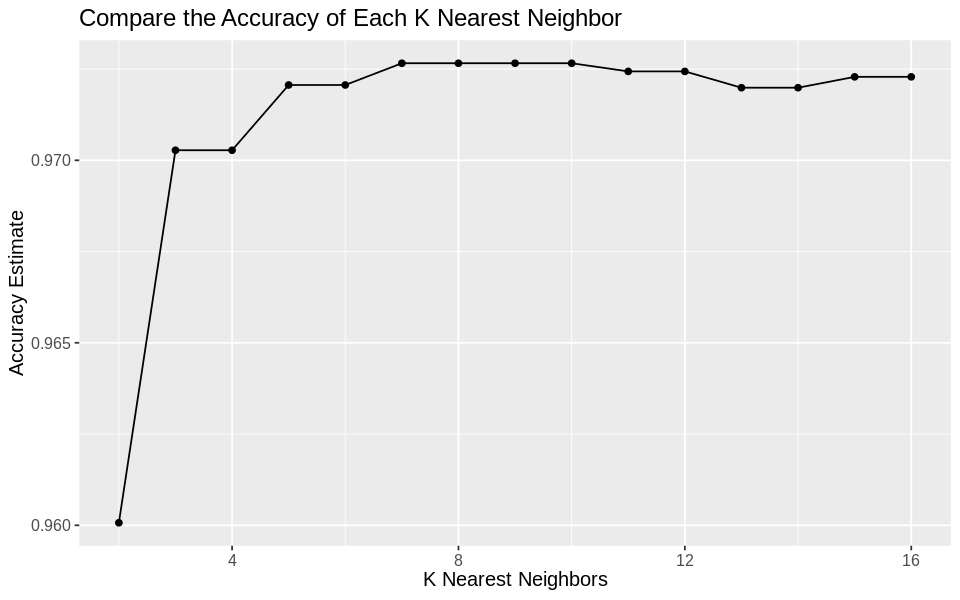

In [13]:
accuracies <- pulsar_knn_results |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "K Nearest Neighbors", y = "Accuracy Estimate") +
  ggtitle("Compare the Accuracy of Each K Nearest Neighbor") +
  theme(text = element_text(size = 12))

cross_val_plot

best_k <- accuracies |>
        arrange(desc(mean)) |>
        slice(1)
best_k     

### Building Model Specifications and Workflow for the final K-NN model using K = 9 Neighbours.

In [14]:
set.seed(3)
    
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
  set_engine("kknn") |>
  set_mode("classification")

pulsar_knn_fit <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(pulsar_spec) |>
  fit(data = pulsar_train)

### Predict Labels in the Test Set

In [15]:
pulsar_predictions <- predict(pulsar_knn_fit, pulsar_test) |>
  bind_cols(pulsar_test)

pulsar_predictions

.pred_class,Mean_integrated,Std_integrated,Mean_curve,Std_curve,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
No,140.56250,55.68378,3.199833,19.11043,No
No,88.72656,40.67223,1.178930,11.46872,No
No,142.07812,45.28807,5.376254,29.00990,No
⋮,⋮,⋮,⋮,⋮,⋮
No,90.14844,40.78604,5.3545150,29.759511,No
No,121.37500,53.24516,1.0953177,12.239976,No
No,118.48438,50.60848,0.4222408,8.086684,No


### Evaluate Performance of Classifier

In [16]:
pulsar_metrics <- pulsar_predictions |>
metrics(truth = Class, estimate = .pred_class)  |>
filter(.metric == 'accuracy')
pulsar_metrics

pulsar_predictions |> pull(Class) |> levels()

pulsar_precision <- pulsar_predictions |>
precision(truth = Class, estimate = .pred_class, event_level = "first")
pulsar_precision

pulsar_recall <- pulsar_predictions |>
recall(truth = Class, estimate = .pred_class, event_level = "first")
pulsar_recall

pulsar_mat <- pulsar_predictions |>
conf_mat(truth = Class, estimate = .pred_class)
pulsar_mat

pulsar_f1 <- 2 * pulsar_recall_estimate * pulsar_precision_estimate/(pulsar_recall_estimate + pulsar_precision_estimate) |>
as_tibble() |>
rename(F1_estimate = value)
pulsar_f1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.972514


[1] "No"  "Yes"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.9776699


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9923627


          Truth
Prediction   No  Yes
       No  4028   92
       Yes   31  324

ERROR: Error in eval(expr, envir, enclos): object 'pulsar_recall_estimate' not found
